# Arbeitsblatt 3: Supportvektormaschinen mit Scikit Learn, Random Forests und Boosting

## 1. Klassifikation mit SVMs

In unserer letzten Übung befassen wir uns mit dem Python-Paket *Scikit Learn*, mit dem sich die meisten Standard-Lernmaschinen auf sehr bequeme (und trotzdem performante) Weise realisieren lassen. Schauen Sie sich zunächst das einführende Tutorium unter `http://scikit-learn.org/stable/tutorial/basic/tutorial.html` an, um die grundsätzliche Syntax zu erlernen.

Aufgaben:


a) Laden Sie, wie im Tutorium beschrieben, den berühmten MNIST-Datensatz mit eingescannten handgeschriebenen Ziffern mit der Funktion `digits = load_digits()`. Grundlegende Informationen zum Datensatz erhalten Sie durch Ausgabe des Attributes `digits.DESCR`. Die Merkmalsvektoren (hier Bilder) sind die Zeilen der Designmatrix `digits.data`, die zugehörigen Labels stehen in dem Vektor `digits.target`. Wie in Arbeitsblatt 1 gelernt, finden Sie heraus, wieviele und welche Labels und wieviele Daten es gibt, und welche Dimension diese haben. Stellen Sie eine Zufallsauswahl von 10 Bildern (zusammen mit der Klassenzugehörigkeit) in Ihrem Notebook dar.

In [1]:
# python
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
import random

digits = load_digits()

print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Anzahl Beispiele: 1797
Anzahl Merkmale pro Beispiel: 64
Labels: [0 1 2 3 4 5 6 7 8 9]
Anzahl pro Label: {0: 178, 1: 182, 2: 177, 3: 183, 4: 181, 5: 182, 6: 181, 7: 179, 8: 174, 9: 180}


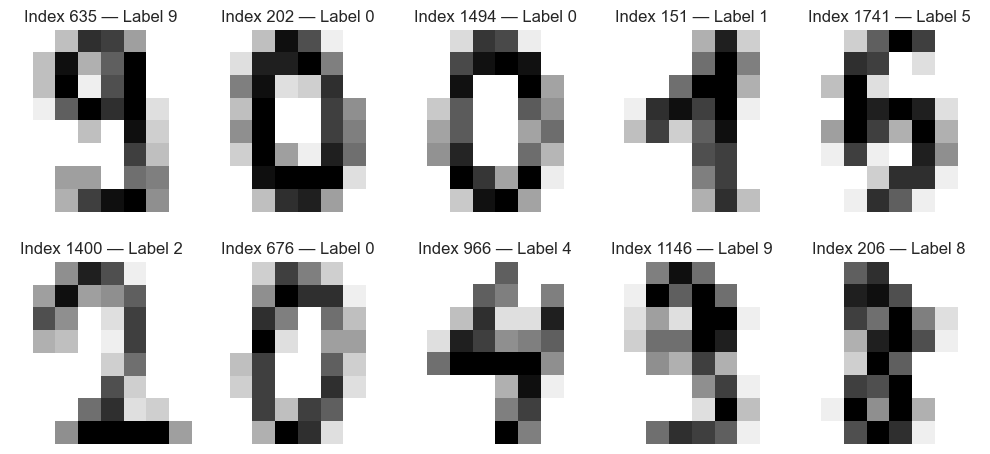

In [12]:
print("Anzahl Beispiele:", digits.data.shape[0])
print("Anzahl Merkmale pro Beispiel:", digits.data.shape[1])
labels, counts = np.unique(digits.target, return_counts=True)
print("Labels:", labels)
print("Anzahl pro Label:", dict(zip(labels, counts)))

# Zufallsauswahl von 10 Bildern anzeigen
idx = random.sample(range(digits.data.shape[0]), 10)
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, i in zip(axes.ravel(), idx):
    ax.imshow(digits.images[i], cmap='gray_r', interpolation='nearest')
    ax.set_title(f"Index {i} — Label {digits.target[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

b) Teilen Sie den Datensatz zufällig in einen nichtüberlappenden Trainings- und Testdatensatz auf, so dass ein Viertel der Daten zu Testdaten werden. Dies geschieht am Einfachsten mit der Funktion `sklearn.model_selection.train_test_split()`. Trainieren Sie einen Supportvektor-Klassifikator (Standard in *Scikit Learn* ist eine 1-Norm Soft Margin SVM, bei Mehrklassenproblemen wird automatisch ein Satz von one-vs.-one-Klassifikatoren erstellt) mit einem RBF-Kern mit $\gamma = 0.015$ und einem Parameter $C = 1.0$. Bestimmen Sie den Anteil korrekt klassifizierter Beispiele (Korrektklassifikationsrate, **Treffergenauigkeit**, engl. *Accuracy*) im Trainings- und Testdatensatz mithilfe der Funktion `SVC.score()`. **Underfitting** liegt vor, wenn Ihr Klassifikator auf den Trainingsdatensatz eine Treffergenauigkeit von deutlich unter 100% erzielt, bei **Overfitting** liegt die Treffergenauigkeit auf dem Testdatensatz deutlich unter der auf dem Trainingsdatensatz. Welcher Fall liegt hier vor? Probieren Sie alternativ die SVM-Parameter $\gamma = 0.001$ und $C = 100$ und vergleichen Sie. Wiederholen Sie das Experiment für einen anderen Zufallssplit in Trainings- und Testdatensatz. Wie stark hängt Ihr Ergebnis von der zufälligen Teilung in Trainings- und Testdatensatz ab?


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

def run_experiment(seed, gamma, C):
    X_train, X_test, y_train, y_test = train_test_split(
        digits.data, digits.target, test_size=0.4, random_state=seed, shuffle=True, stratify=digits.target
    )
    clf = SVC(kernel='rbf', gamma=gamma, C=C)
    clf.fit(X_train, y_train)
    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    return train_acc, test_acc

params = [
    {'gamma': 0.015, 'C': 1.0},
    {'gamma': 0.001, 'C': 100.0},
]

for rs in (0, 1, 2, 3):
    print(f"--- Random seed={rs} ---")
    for p in params:
        train_acc, test_acc = run_experiment(rs, p['gamma'], p['C'])
        delta = train_acc - test_acc
        print(f"gamma={p['gamma']}, C={p['C']}: train_acc={train_acc:.4f}, test_acc={test_acc:.4f}, delta={delta:.4f}")
        if train_acc < 0.95:
            print("  Hinweis: mögliches Underfitting (Trainingsgenauigkeit deutlich unter 100\%).")
        elif delta > 0.05:
            print("  Hinweis: mögliches Overfitting (Test deutlich schlechter als Training).")
        else:
            print("  Hinweis: kein starkes Under/Overfitting erkennbar.")
    print()

--- Random seed=0 ---
gamma=0.015, C=1.0: train_acc=1.0000, test_acc=0.5744, delta=0.4256
  Hinweis: mögliches Overfitting (Test deutlich schlechter als Training).
gamma=0.001, C=100.0: train_acc=1.0000, test_acc=0.9930, delta=0.0070
  Hinweis: kein starkes Under/Overfitting erkennbar.

--- Random seed=1 ---
gamma=0.015, C=1.0: train_acc=1.0000, test_acc=0.5897, delta=0.4103
  Hinweis: mögliches Overfitting (Test deutlich schlechter als Training).
gamma=0.001, C=100.0: train_acc=1.0000, test_acc=0.9861, delta=0.0139
  Hinweis: kein starkes Under/Overfitting erkennbar.

--- Random seed=2 ---
gamma=0.015, C=1.0: train_acc=1.0000, test_acc=0.5675, delta=0.4325
  Hinweis: mögliches Overfitting (Test deutlich schlechter als Training).
gamma=0.001, C=100.0: train_acc=1.0000, test_acc=0.9889, delta=0.0111
  Hinweis: kein starkes Under/Overfitting erkennbar.

--- Random seed=3 ---
gamma=0.015, C=1.0: train_acc=1.0000, test_acc=0.6231, delta=0.3769
  Hinweis: mögliches Overfitting (Test deutlic

Man sieht keine signifikanten unterschiede wenn man unterschiedliche Seeds für das aufteilen der Daten benutzt

## 2. Kreuzvalidierung und Modellselektion

Bei der Methode der Kreuzvalidierung wird der zufällige Split in Trainings- und Testdatensatz aus Aufgabe 1 mehrere Male wiederholt und der Durchschnitt über mehrere Splits berechnet, um eine genauere Schätzung der wirklichen Treffergenauigkeit zu erhalten. *Scikit Learn* stellt dafür bereits eine vordefinierte Methode zur Verfügung: `sklearn.model_selection`. Die Methode verwendet die Iteratorsyntax von Python, Beispiele zur Verwendung finden Sie in der Dokumentation dieser Methode. `ShuffleSplit()` erzeugt einen Satz von permutierten Indizes von Trainings- und Testdaten.

Aufgaben:

a) Erzeugen Sie zunächst 3 Sätze und trainieren Sie für jeden Satz eine SVM mit $\gamma = 0.001$ und $C = 1$ und geben Sie jeweils die Treffergenauigkeit für Trainings- und Testdatensatz aus. Die Ergebnisse sollten ähnlich wie in Aufgabe 1b aussehen.

In [19]:
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC

svm_fold = SVC(kernel='rbf', gamma=0.001, C=1.0)
sss = ShuffleSplit(n_splits=3, test_size=0.4, random_state=42)


for i, (train_idx, test_idx) in enumerate(sss.split(digits.data, digits.target)):
    X_train, X_test = digits.data[train_idx], digits.data[test_idx]
    y_train, y_test = digits.target[train_idx], digits.target[test_idx]

    svm_fold.fit(X_train, y_train)

    train_acc = svm_fold.score(X_train, y_train)
    test_acc = svm_fold.score(X_test, y_test)

    print(f"Split {i}: train_acc={train_acc:.4f}, test_acc={test_acc:.4f}")

Split 0: train_acc=0.9991, test_acc=0.9930
Split 1: train_acc=0.9991, test_acc=0.9917
Split 2: train_acc=0.9981, test_acc=0.9861


b) Statt wie in 2a von Hand vorzugehen gibt es in *Scikit Learn* die bereits vordefinierte Methode `sklearn.model_selection.cross_val_score()`. Wiederholen Sie Ihr Experiment aus Aufgabe 2a mit 10 Zufallssplits und geben Sie jeweils die Treffergenauigkeit auf dem Testdatensatz aus. Berechnen Sie die mittlere Treffergenauigkeit (die **Kreuzvalidierungsgenauigkeit**) und die Standardabweichung des Mittelwerts.

In [21]:
# python
from sklearn.model_selection import cross_val_score

# SVM wie in 2a
clf = SVC(kernel='rbf', gamma=0.001, C=1.0)

# 10 zufällige Splits, Testanteil 40% (entsprechend deiner Änderung in 2a)
cv = ShuffleSplit(n_splits=10, test_size=0.4, random_state=42)

# Kreuzvalidierung (Accuracy)
scores = cross_val_score(clf, digits.data, digits.target, cv=cv, scoring='accuracy', n_jobs=-1)

# Ausgabe je Split und Zusammenfassung
for i, s in enumerate(scores, start=1):
    print(f"Fold {i}: test_acc={s:.4f}")

mean_acc = scores.mean()
sem = scores.std(ddof=1) / np.sqrt(len(scores))  # Standardabweichung des Mittelwerts
print(f"\nKreuzvalidierungsgenauigkeit (Mittel): {mean_acc:.4f}")
print(f"Standardfehler des Mittels: {sem:.4f}")

Fold 1: test_acc=0.9930
Fold 2: test_acc=0.9917
Fold 3: test_acc=0.9861
Fold 4: test_acc=0.9917
Fold 5: test_acc=0.9861
Fold 6: test_acc=0.9861
Fold 7: test_acc=0.9875
Fold 8: test_acc=0.9847
Fold 9: test_acc=0.9917
Fold 10: test_acc=0.9861

Kreuzvalidierungsgenauigkeit (Mittel): 0.9885
Standardfehler des Mittels: 0.0010


c) Mithilfe der Kreuzvalidierungsgenauigkeit können die optimalen $\gamma$- und $C$-Parameter der SVM automatisch gefunden werden. Dieser Vorgang heißt Modellselektion. Man führt zu diesem Zweck eine Gittersuche durch: zunächst wird ein Satz von Werten für $\gamma$ und $C$ festgelegt. Für alle Wertepaare wird die Kreuzvalidierungsgenauigkeit bestimmt und dann
die Parameter gewählt, die die höchste Treffergenauigkeit erzielen. Finden Sie auf diese Weise für $C = 10$ den besten Gammawert aus einem Satz von 10 logarithmisch skalierten Gammawerten, erzeugt mit

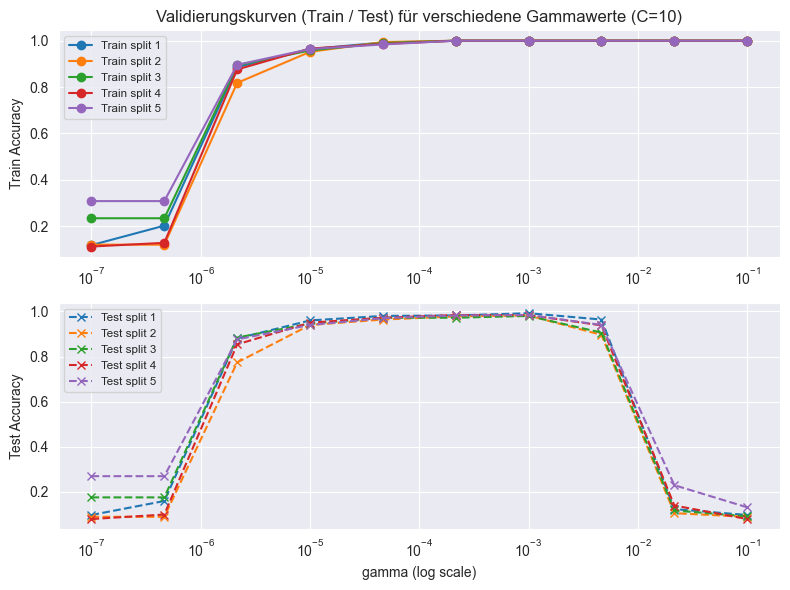

Bestes Gamma (höchste mittlere Test-Accuracy): 1.0e-03
gamma= 1.0e-07: mean_train=0.1784, mean_test=0.1428
gamma= 4.6e-07: mean_train=0.1984, mean_test=0.1592
gamma= 2.2e-06: mean_train=0.8740, mean_test=0.8536
gamma= 1.0e-05: mean_train=0.9608, mean_test=0.9472
gamma= 4.6e-05: mean_train=0.9892, mean_test=0.9716
gamma= 2.2e-04: mean_train=1.0000, mean_test=0.9796
gamma= 1.0e-03: mean_train=1.0000, mean_test=0.9844
gamma= 4.6e-03: mean_train=1.0000, mean_test=0.9288
gamma= 2.2e-02: mean_train=1.0000, mean_test=0.1436
gamma= 1.0e-01: mean_train=1.0000, mean_test=0.0984

Ungefähr Underfitting bei Gamma-Werten: keine
Ungefähr Overfitting bei Gamma-Werten: ['4.6e-03', '2.2e-02', '1.0e-01']


In [25]:
# python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC

digits = load_digits()
gammas = np.logspace(-7, -1, 10)
C = 10.0
n_splits = 5
train_size = 500
test_size = 500

ss = ShuffleSplit(n_splits=n_splits, train_size=train_size, test_size=test_size, random_state=42)

train_scores = np.zeros((n_splits, len(gammas)))
test_scores = np.zeros((n_splits, len(gammas)))

for si, (train_idx, test_idx) in enumerate(ss.split(digits.data, digits.target)):
    X_train, X_test = digits.data[train_idx], digits.data[test_idx]
    y_train, y_test = digits.target[train_idx], digits.target[test_idx]
    for gi, g in enumerate(gammas):
        clf = SVC(kernel='rbf', gamma=g, C=C)
        clf.fit(X_train, y_train)
        train_scores[si, gi] = clf.score(X_train, y_train)
        test_scores[si, gi] = clf.score(X_test, y_test)

# Plot: Trainings- und Testkurven (je Split) in zwei Subplots
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
for i in range(n_splits):
    plt.semilogx(gammas, train_scores[i], marker='o', label=f'Train split {i+1}')
plt.ylabel('Train Accuracy')
plt.title('Validierungskurven (Train / Test) für verschiedene Gammawerte (C=10)')
plt.legend(loc='upper left', fontsize='small')

plt.subplot(2, 1, 2)
for i in range(n_splits):
    plt.semilogx(gammas, test_scores[i], marker='x', linestyle='--', label=f'Test split {i+1}')
plt.xlabel('gamma (log scale)')
plt.ylabel('Test Accuracy')

plt.legend(loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

# Zusammenfassung: Mittelwerte und Bestes Gamma
mean_train = train_scores.mean(axis=0)
mean_test = test_scores.mean(axis=0)
best_idx = np.argmax(mean_test)
best_gamma = gammas[best_idx]

print(f"Bestes Gamma (höchste mittlere Test-Accuracy): {best_gamma:.1e}")
for gi, g in enumerate(gammas):
    print(f"gamma={g: .1e}: mean_train={mean_train[gi]:.4f}, mean_test={mean_test[gi]:.4f}")

# Einfache Klassifikation von Under/Overfitting-Bereichen
underfit = [g for gi, g in enumerate(gammas) if mean_train[gi] < 0.90 and abs(mean_train[gi] - mean_test[gi]) < 0.02]
overfit = [g for gi, g in enumerate(gammas) if (mean_train[gi] - mean_test[gi]) > 0.05]

print("\nUngefähr Underfitting bei Gamma-Werten:", [f"{g:.1e}" for g in underfit] or "keine")
print("Ungefähr Overfitting bei Gamma-Werten:", [f"{g:.1e}" for g in overfit] or "keine")

Verwenden Sie dazu eine Trainings- und Testdatensatzgröße von 500 und 5 Splits (s. Dokumentation von `ShuffleSplit`) und speichern Sie die Treffergenauigkeit auf dem Trainings- und Testdatensatz für jeden Gammawert und Split. Plotten Sie die Treffergenauigkeitskurve für jeden Split mit dem Gammawert als Abszisse in einem gemeinsamen Diagramm, jeweils für die Trainings- und die Testdaten. Diese Kurven werden **Validierungskurven** genannt
(s.u.). Für welche Gammawerte erhalten Sie Underfitting, für welche Overfitting? Wo liegt der optimale Gammawert?

<img src="validierungskurve.png" alt="drawing" width="500"/>

d) Die Gittersuche lässt sich ebenfalls automatisieren mit `sklearn.model_selection. GridSearchCV()`. Wir erzeugen dazu ein Gitter aus Wertepaaren für $\gamma$ und $C$ mit dem Dictionary

In [4]:
svc_params = {
    'C': np.logspace(-1, 2, 4),
    'gamma': np.logspace(-4, 0, 5), 
}

Dieses Gitter kann direkt an `GridSearchCV()` als Argument `param_grid` übergeben werden. Da diese Prozedur sehr zeitaufwendig ist, verkleinern wie den Datensatz auf die ersten 500 Beispiele. Führen Sie für diesen verkleinerten Datensatz eine Gittersuche mithilfe von `GridSearchCV()` und jeweils 3 Splits (Parameter `cv`) durch. Den besten Parametersatz erhalten Sie mit `GridSearchCV().best_params_`, die höchste Treffergenauigkeit mit `GridSearchCV().best_score_`. Ausführliche Informationen zu jedem Parameterwertepaar stehen in dem Dictionary `GridSearchCV().cv_results_`. Nach der Gittersuche führt `GridSearchCV()` noch ein Training auf dem gesamten Datensatz mit den besten Parametern durch, so dass die resultierende Maschine sofort eingesetzt werden kann. Testen Sie diese Maschine auf den übriggebliebenen Daten.

In [28]:
from sklearn.model_selection import GridSearchCV

# Trainings‑/Validierungsmenge: erste 500 Beispiele
X_train = digits.data[:500]
y_train = digits.target[:500]

# Zurückbehaltene Testmenge: restliche Beispiele
X_test = digits.data[500:]
y_test = digits.target[500:]

svc_params = {
    'C': np.logspace(-1, 2, 4),
    'gamma': np.logspace(-4, 0, 5),
}

base_clf = SVC(kernel='rbf')

gs = GridSearchCV(base_clf, param_grid=svc_params, cv=3, n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)

print("Bestes Parameterset:", gs.best_params_)
print("Beste mittlere CV-Accuracy:", gs.best_score_)

best_clf = gs.best_estimator_
test_acc = best_clf.score(X_test, y_test)
print("Accuracy auf den übrigen Daten:", test_acc)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Bestes Parameterset: {'C': 100.0, 'gamma': 0.0001}
Beste mittlere CV-Accuracy: 0.9219031815886299
Accuracy auf den übrigen Daten: 0.9414032382420972



## 3. Klassifikation mit Random Forests und Boosting

a) Wiederholen Sie Aufgabe 1 b mit einem Random Forest. Teilen Sie dazu den Datensatz wieder in einen Trainings- und Testdatensatz. Bestimmen Sie den Fehler auf den Testdaten und vergleichen Sie ihn mit dem ”out of bag”-Fehler.

b) Wiederholen sie Aufgabe 1 b mit einem Boosting-Verfahren. Sie können dazu entweder die Implementierung von *sklearn* verwenden oder Sie installieren *xgboost* (`https://github.com/dmlc/xgboost`) oder *catboost* (`https://catboost.ai/docs/`).

c) Optional: Finden Sie die optimalen Hyperparameter der Algorithmen mit der in 2 d beschriebenen Gittersuche.